In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Download the data from Ohio's COVID-19 website
df = pd.read_csv('https://coronavirus.ohio.gov/static/COVIDSummaryData.csv',low_memory=False)

In [3]:
# Remove the last row of totals
df = df.drop(df.index[df.shape[0]-1])

In [4]:
# Setup data types and make the data more usable
df["Case Count"]                         = pd.to_numeric(df["Case Count"])
df["Hospitalized Count"]                 = pd.to_numeric(df["Hospitalized Count"])
df["Death Due to Illness Count"]         = pd.to_numeric(df["Death Due to Illness Count"])
df["Onset Date"]                         = pd.to_datetime(df["Onset Date"])
df["Date Of Death"]                      = pd.to_datetime(df["Date Of Death"], errors='coerce')
df["Admission Date"]                     = pd.to_datetime(df["Admission Date"], errors='coerce')

df["County"]                             = df["County"].astype('category')
df["Sex"]                                = df["Sex"].astype('category')
df["Age Range"]                          = df["Age Range"].astype('category')

df["Date Of Death"]                      = df["Date Of Death"].fillna("2020-03-01")

In [5]:
df

,County,Sex,Age Range,Onset Date,Date Of Death,Admission Date,Case Count,Death Due to Illness Count,Hospitalized Count
0,Adams,Female,0-19,2020-04-28,2020-03-01,NaT,1,0,0
1,Adams,Female,0-19,2020-06-10,2020-03-01,NaT,1,0,0
2,Adams,Female,0-19,2020-06-19,2020-03-01,NaT,1,0,0
3,Adams,Female,0-19,2020-06-30,2020-03-01,NaT,1,0,0
4,Adams,Female,0-19,2020-07-18,2020-03-01,NaT,1,0,0
...,...,...,...,...,...,...,...,...,...
86870,Wyandot,Male,80+,2020-05-25,2020-03-01,NaT,1,0,0
86871,Wyandot,Male,80+,2020-05-25,2020-06-12 00:00:00,2020-06-02,1,1,1
86872,Wyandot,Male,80+,2020-07-22,2020-03-01,NaT,2,0,0
86873,Wyandot,Male,80+,2020-07-23,2020-08-11 00:00:00,NaT,1,1,0


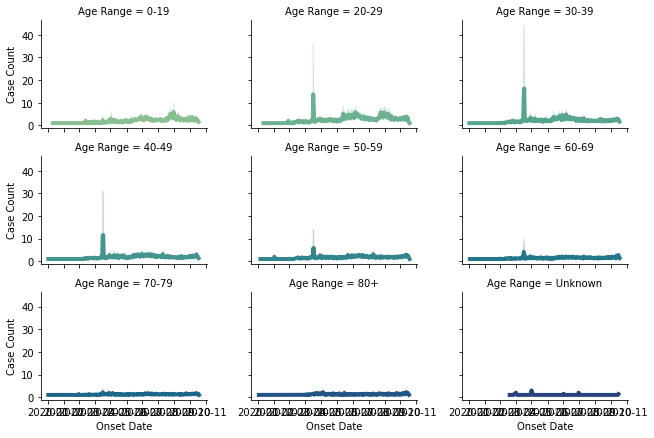

In [6]:
g = sns.relplot(
    data=df[["Age Range","Onset Date","Case Count"]],
    x="Onset Date", y="Case Count", col="Age Range", hue="Age Range",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)

In [7]:
df["Onset Month"] = pd.DatetimeIndex(df["Onset Date"]).month

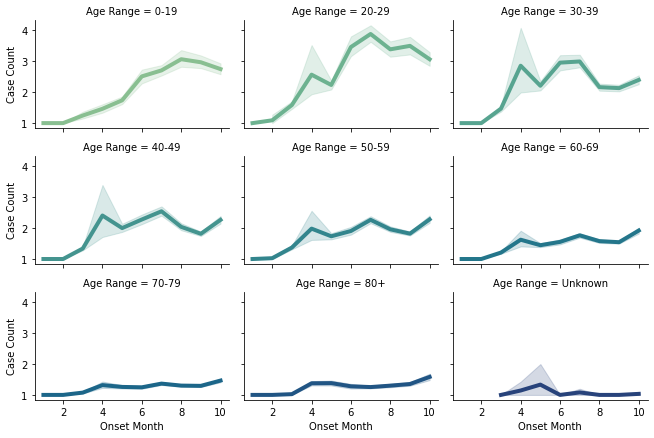

In [8]:
g = sns.relplot(
    data=df[["Age Range","Onset Month","Case Count"]],
    x="Onset Month", y="Case Count", col="Age Range", hue="Age Range",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)

In [9]:
df[["Age Range","Onset Date","Case Count"]][(df["Onset Date"]> '2020-10-01')]

,Age Range,Onset Date,Case Count
16,0-19,2020-10-08,1
17,0-19,2020-10-09,1
31,20-29,2020-10-02,1
32,20-29,2020-10-08,1
33,20-29,2020-10-12,1
...,...,...,...
86852,60-69,2020-10-06,1
86853,60-69,2020-10-09,1
86854,60-69,2020-10-13,1
86867,70-79,2020-10-05,1


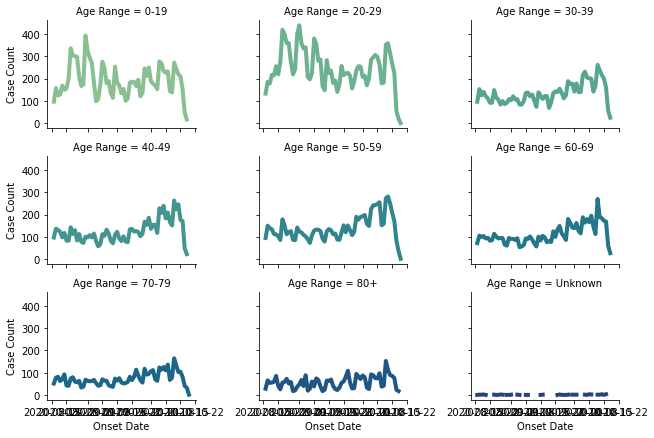

In [10]:
g = sns.relplot(
    data=df[["Age Range","Onset Date","Case Count"]][(df["Onset Date"]> '2020-08-15')].groupby(["Age Range","Onset Date"]).sum(),
    x="Onset Date", y="Case Count", col="Age Range", hue="Age Range",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)

In [11]:
caseCountRecent = df[["Age Range","Onset Date","Case Count"]][(df["Onset Date"]> '2020-08-15')].groupby(["Age Range"]).sum()
caseCountRecent

,Case Count
Age Range,
0-19,12315
20-29,15924
30-39,8570
40-49,8074
50-59,9130
60-69,7183
70-79,4794
80+,3715
Unknown,79


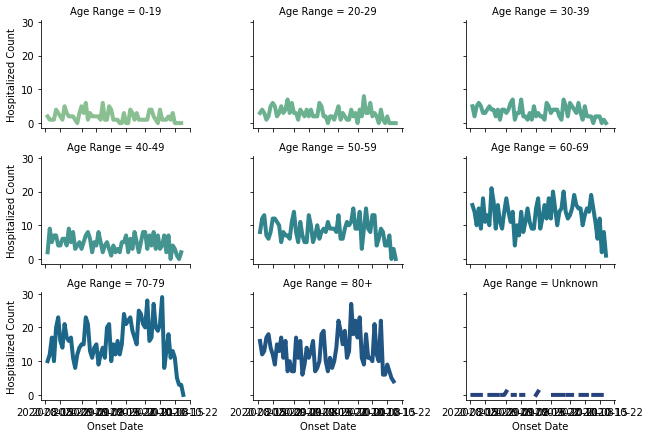

In [12]:
g = sns.relplot(
    data=df[["Age Range","Onset Date","Hospitalized Count"]][(df["Onset Date"]> '2020-08-15')].groupby(["Age Range","Onset Date"]).sum(),
    x="Onset Date", y="Hospitalized Count", col="Age Range", hue="Age Range",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)

In [13]:
hospCountRecent = df[["Age Range","Onset Date","Hospitalized Count"]][(df["Onset Date"]> '2020-08-15')].groupby(["Age Range"]).sum()
hospCountRecent

,Hospitalized Count
Age Range,
0-19,123
20-29,179
30-39,208
40-49,296
50-59,548
60-69,819
70-79,1025
80+,827
Unknown,2


In [14]:
hospCountRecent["Hospitalized Count"]/caseCountRecent["Case Count"]*100

Age Range
0-19        0.998782
20-29       1.124089
30-39       2.427071
40-49       3.666089
50-59       6.002191
60-69      11.401921
70-79      21.380893
80+        22.261104
Unknown     2.531646
dtype: float64

In [16]:
summary = df[["Age Range","Onset Date","Case Count","Hospitalized Count","Death Due to Illness Count"]]

In [17]:
onsetSortedSummary = summary.sort_values("Onset Date")

In [19]:
groupedOnsetSortedSummary = onsetSortedSummary.groupby(["Age Range","Onset Date"]).sum().fillna(0)
#TODO Clean up 7 day rolling and implement for both Case and Hospitalized
groupedOnsetSortedSummary["Case 7 Day"] = onsetSortedSummary["Case Count"].rolling(2).mean()
groupedOnsetSortedSummary

Case Count  Hospitalized Count  \
Age Range Onset Date                                   
0-19      2020-01-02         0.0                 0.0   
          2020-01-03         0.0                 0.0   
          2020-01-04         0.0                 0.0   
          2020-01-05         0.0                 0.0   
          2020-01-06         0.0                 0.0   
...                          ...                 ...   
Unknown   2020-10-15         1.0                 0.0   
          2020-10-16         4.0                 0.0   
          2020-10-17         0.0                 0.0   
          2020-10-18         0.0                 0.0   
          2020-10-19         0.0                 0.0   

                      Death Due to Illness Count  Case 7 Day  
Age Range Onset Date                                          
0-19      2020-01-02                         0.0         NaN  
          2020-01-03                         0.0         NaN  
          2020-01-04                         0.0         NaN  
          2020-01-05                         0.0         NaN  
          2020-01-06                         0.0         NaN  
...                                          ...         ...  
Unknown   2020-10-15                         0.0         NaN  
          2020-10-16                         0.0         NaN  
          2020-10-17                         0.0         NaN  
          2020-10-18                         0.0         NaN  
          2020-10-19                         0.0         NaN  

[2583 rows x 4 columns]

In [25]:
def replotbyAge(dataFrame,xValue,yValue,age):
    g = sns.relplot(
        data=dataFrame,
        x=xValue, y=yValue, col=age, hue=age,
        kind="line", palette="crest", linewidth=4, zorder=5,
        col_wrap=3, height=5, aspect=1.5, legend=False
    )

    # Iterate over each subplot to customize further
    for ageGroup, ax in g.axes_dict.items():

        # Add the title as an annotation within the plot
        ax.text(.8, .85, ageGroup, transform=ax.transAxes, fontweight="bold")

        # Plot every year's time series in the background
        sns.lineplot(
            data=dataFrame, x=xValue, y=yValue, units=age,
            estimator=None, color=".7", linewidth=1, ax=ax,
        )

    # Reduce the frequency of the x axis ticks
    ax.set_xticks(ax.get_xticks()[::2])

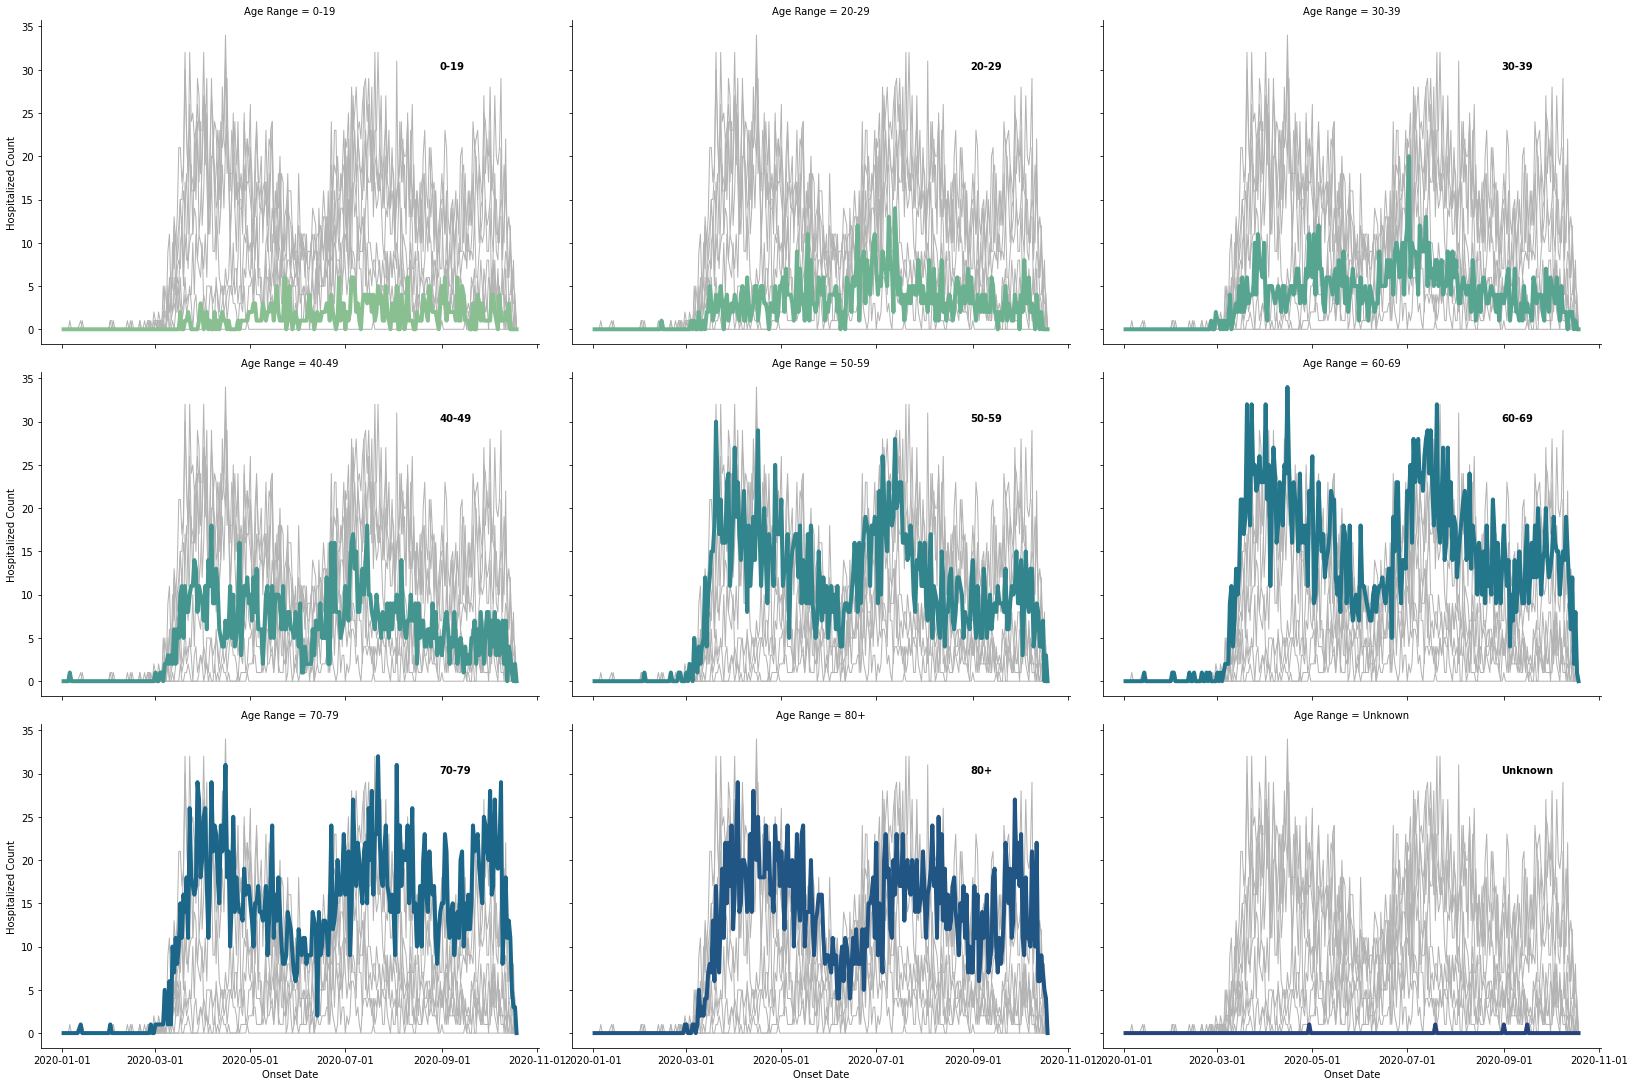

In [27]:
replotbyAge(groupedOnsetSortedSummary,"Onset Date","Hospitalized Count","Age Range")

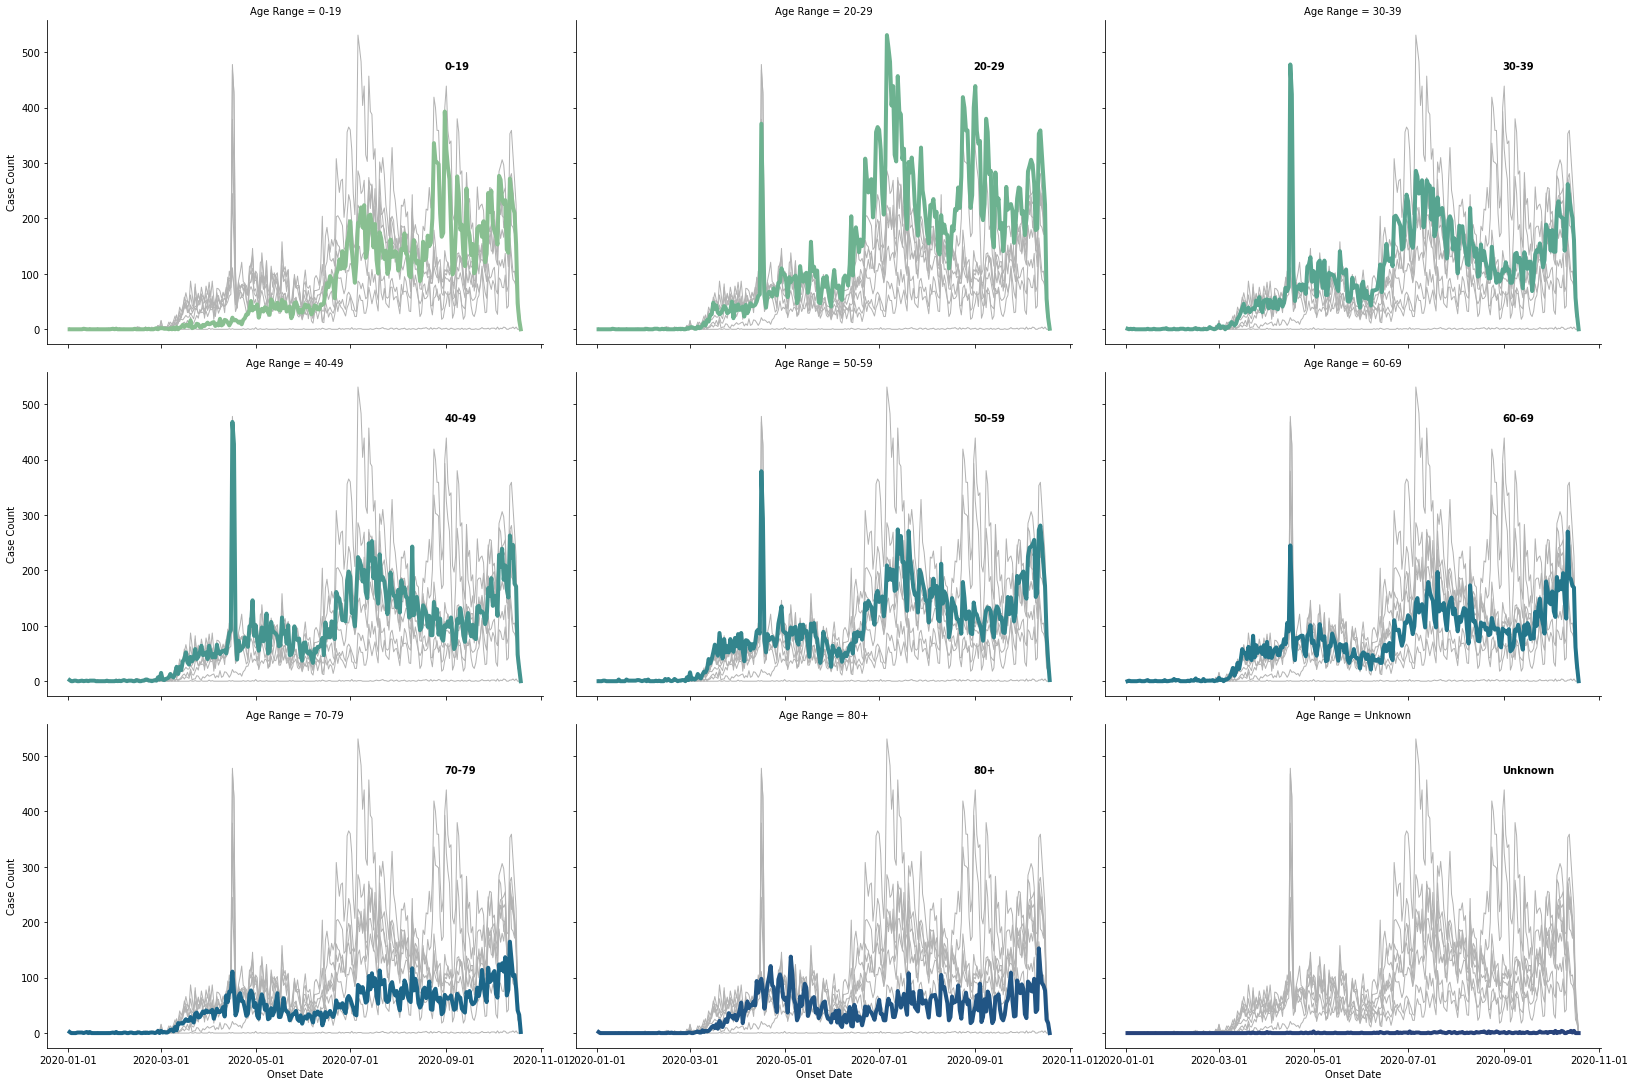

In [29]:
replotbyAge(groupedOnsetSortedSummary,"Onset Date","Case Count","Age Range")

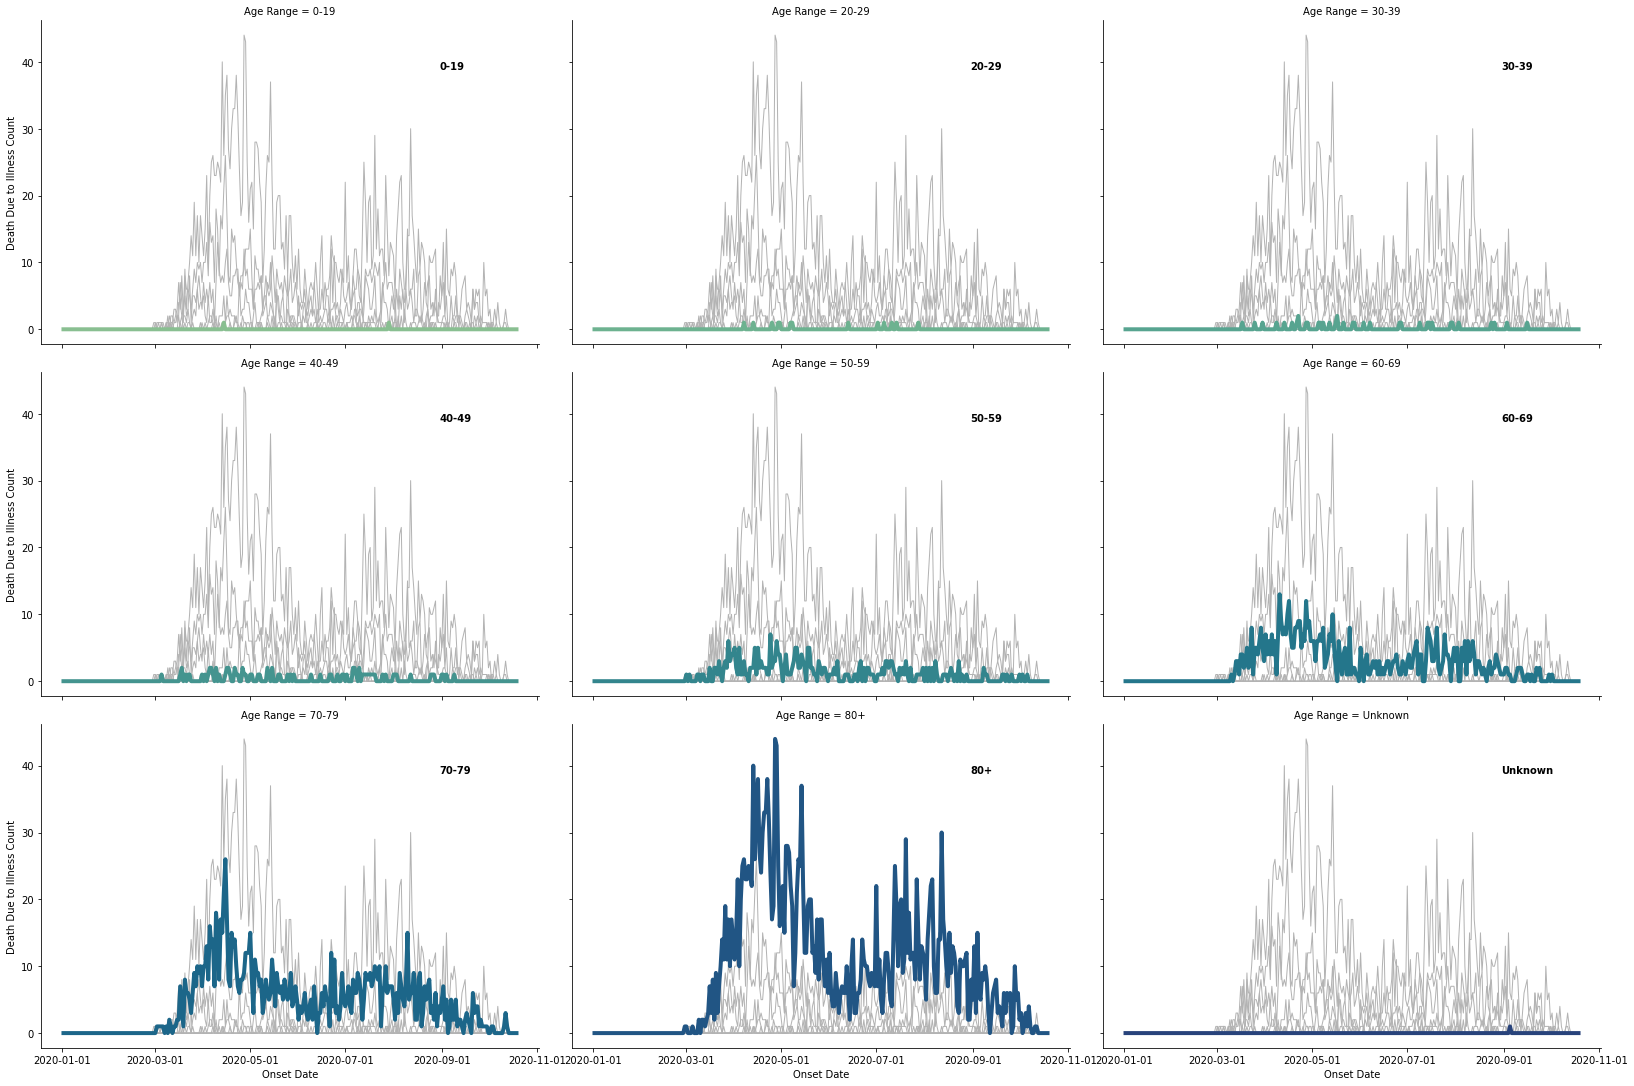

In [31]:
replotbyAge(groupedOnsetSortedSummary,"Onset Date","Death Due to Illness Count","Age Range")